# OLAP Operationen
OLAP steht für **O**n**l**ine **A**nalytical **P**rocessing und bezeichnet eine Methode, Daten aus verschiedenen Blickwinkeln zu erfassen und zu analysieren. Als Basis dafür dient ein Ergebniswürfel.

## Inhaltsverzeichnis
- [Vorbereitung](#Vorbereitung)
- [Pivotierung](#Pivotierung)
- [Roll-Up und Drill-Down](#Roll-Up-und-Drill-Down)
- [Drill-Across](#Drill-Across)
- [Slice and Dice](#Slice-and-Dice)
- [Hinweise zum Datensatz](#Hinweise-zum-Datensatz)

## Vorbereitung
Zunächst wird Pandas geladen und der Ergebniswürfel des vorigen Abschnitts erneut erzeugt.

In [ ]:
import pandas as pd

df = pd.read_csv('disney_plus_titles.csv')
df = df[(df['budget'] > 0) & (df['vote_count'] > 0) & (df['runtime'] > 0)]
df['budget'] = pd.cut(df['budget'],
                      (0, 1_000_000, 100_000_000, df['budget'].max()),
                      labels=('klein', 'mittel', 'groß'))
df['runtime'] = pd.cut(df['runtime'],
                       (0, 60, 150, df['runtime'].max()),
                       labels=('kurz', 'mittel', 'lang'))

result = df.groupby(['release_year', 'runtime', 'budget'])['vote_average'].mean()
result.tail(18)

## Pivotierung
Die **Pivotierung** oder auch Rotation beschreibt ein Vertauschen der Dimensionen, um einen anderen Blickwinkel zu ermöglichen. In Pandas steht die Funktion `swaplevel` bereit, um zwei Indizes zu vertauschen. Die Funktion verändert nicht die Reihenfolge der Elemente.

In [ ]:
result.swaplevel(i=0, j=2).tail(18)

## Roll-Up und Drill-Down
**Roll-Up** beschreibt eine Operation, die bei hierarchisch strukturierten Daten zum Einsatz kommen. Die Dimensionalität bleibt dabei erhalten. Beliebt ist beispielsweise das Zusammenfassen von Zeitspannen, also Monaten zu Quartalen oder Jahren.

In Pandas ist ein Umweg von Nöten. Verwenden Sie erneut `groupby` und übergeben Sie eine Liste, deren erstes Element eine Funktion ist. Diese erhält als Parameter ein Tupel bestehend aus den indexierten Werten einer Zeile und gibt einen Schlüssel zur Gruppierung zurück. In diesem Fall wird für die neue erste Position des Index nur das Jahr zum Jahrzehnt transformiert.

In [ ]:
result.groupby([lambda x: x[0] // 10 * 10, 'runtime', 'release_year']).mean().tail(18)

(Beachten Sie bitte, dass ein Durchschnitt aus Durchschnitten selten das gewünschte Ergebnis hervorbringt und an dieser Stelle zur Veranschaulichung gedacht ist.)

**Drill-Down** ist die Komplementäroperation zu Roll-Up. In diesem Fall wird von Daten zu detaillierten Daten aggregiert. Die Operation ist aber natürlich durch die Granularität der Daten in der Datenbank beschränkt.

## Drill-Across
**Drill-Across** beschreibt eine Operation, bei der zu einem anderen Ergebniswürfel gewechselt wird. Dabei ändert sich jedoch nur die Kennzahl, die Dimensionen bleiben gleich.

## Slice and Dice
**Slice** dient dem Herausschneiden von *Scheiben* aus dem Würfel. Die Dimensionalität wird also verringert, indem z.B. nur die Werte des aktuellen Jahres verwendet werden.

In [ ]:
result[2019]

**Dice** beschreibt das Heraustrennen eines Teil*würfels*. Die Dimensionalität bleibt dabei erhalten. Verwenden Sie die Funktion `loc`, um anhand der Indizes zu trennen.

In [ ]:
result.loc[2020:, 'kurz':'mittel', 'klein':'mittel']

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[![TMDb Logo]( 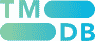)](https://developers.themoviedb.org/3)